**Realistic**: slippage, transaction costs, order delays.

**Stream-based**: Process each event individually, avoids look-ahead bias.

**Batteries included**: Common transforms (moving average) as well as common risk calculations (Sharpe).

**10 years of minute-resolution historical US stock data, and live-trading capabilities**


In [10]:

%matplotlib inline
%load_ext zipline





The zipline extension is already loaded. To reload it, use:
  %reload_ext zipline


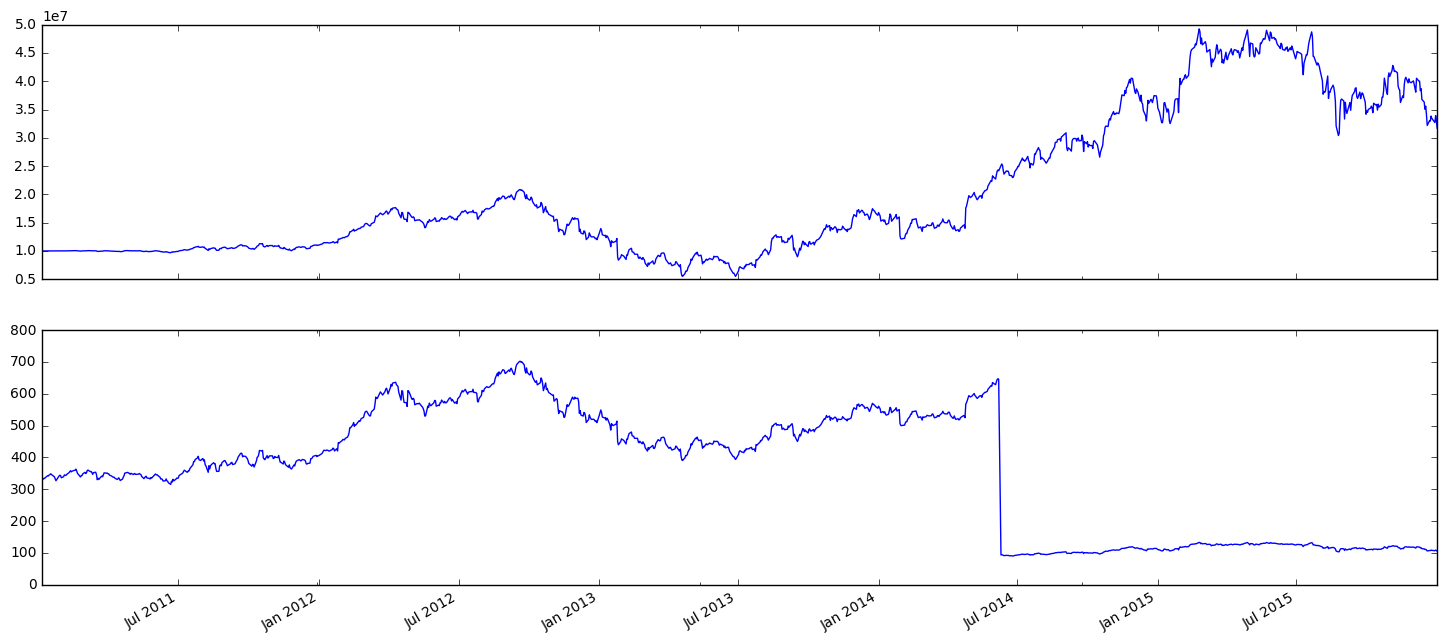

,AAPL,algo_volatility,algorithm_period_return,alpha,benchmark_period_return,benchmark_volatility,beta,capital_used,ending_cash,ending_exposure,...,short_exposure,short_value,shorts_count,sortino,starting_cash,starting_exposure,starting_value,trading_days,transactions,treasury_period_return
2011-01-03 21:00:00+00:00,329.570,NaN,0.000000e+00,NaN,0.011315,NaN,NaN,0.0,1.000000e+07,0.0,...,0,0,0,NaN,1.000000e+07,0.0,0.0,1,[],0.0336
2011-01-04 21:00:00+00:00,331.290,0.000001,-1.000000e-07,-0.000023,0.009987,0.141748,0.000008,-33130.0,9.966870e+06,33129.0,...,0,0,0,-11.224972,1.000000e+07,0.0,0.0,2,"[{'price': 331.29000000271884, 'commission': N...",0.0336
2011-01-05 21:00:00+00:00,334.000,0.000248,2.690000e-05,0.002248,0.015044,0.100231,0.000009,-33401.0,9.933469e+06,66800.0,...,0,0,0,2465.425295,9.966870e+06,33129.0,33129.0,3,"[{'price': 334.00000000401064, 'commission': N...",0.0350
2011-01-06 21:00:00+00:00,333.730,0.000233,2.140000e-05,0.000810,0.012889,0.099481,0.000663,-33374.0,9.900095e+06,100119.0,...,0,0,0,30.879078,9.933469e+06,66800.0,66800.0,4,"[{'price': 333.73000000289886, 'commission': N...",0.0344
2011-01-07 21:00:00+00:00,336.120,0.000512,9.300000e-05,0.005453,0.011021,0.093360,-0.001377,-33613.0,9.866482e+06,134448.0,...,0,0,0,120.024244,9.900095e+06,100119.0,100119.0,5,"[{'price': 336.12000000270825, 'commission': N...",0.0334
2011-01-10 21:00:00+00:00,342.455,0.001588,3.463000e-04,0.016971,0.009629,0.086675,-0.005981,-34246.5,9.832235e+06,171227.5,...,0,0,0,407.965161,9.866482e+06,134448.0,134448.0,6,"[{'price': 342.4550000013344, 'commission': No...",0.0332
2011-01-11 21:00:00+00:00,341.640,0.001566,3.054500e-04,0.014370,0.013390,0.080133,-0.006999,-34165.0,9.798070e+06,204984.0,...,0,0,0,44.476385,9.832235e+06,171227.5,171227.5,7,"[{'price': 341.64000000135803, 'commission': N...",0.0337
2011-01-12 21:00:00+00:00,344.420,0.001606,4.721500e-04,0.015968,0.022518,0.084200,-0.001556,-34443.0,9.763627e+06,241094.0,...,0,0,0,64.303108,9.798070e+06,204984.0,204984.0,8,"[{'price': 344.42000000294917, 'commission': N...",0.0340
2011-01-13 21:00:00+00:00,345.680,0.001510,5.602500e-04,0.016823,0.020769,0.082298,-0.001967,-34569.0,9.729058e+06,276544.0,...,0,0,0,71.934009,9.763627e+06,241094.0,241094.0,9,"[{'price': 345.68000000307694, 'commission': N...",0.0334
2011-01-14 21:00:00+00:00,348.480,0.001638,7.841500e-04,0.018815,0.028307,0.081684,0.001328,-34849.0,9.694209e+06,313632.0,...,0,0,0,95.505023,9.729058e+06,276544.0,276544.0,10,"[{'price': 348.48000000286436, 'commission': N...",0.0335


In [22]:
%%zipline --start=2011-1-1 --end=2016-1-1

from zipline.api import order, record, symbol
import matplotlib.pyplot as plt

def initialize(context):
    pass

def handle_data(context, data):
    order(symbol('AAPL'), 100)
    record(AAPL=data[symbol('AAPL')].price)
    
def analyze(context, perf):
    ax1 = plt.subplot(211)
    perf.portfolio_value.plot(ax=ax1)
    ax2 = plt.subplot(212, sharex=ax1)
    perf.AAPL.plot(ax=ax2)
    plt.gcf().set_size_inches(18, 8)
    plt.show()



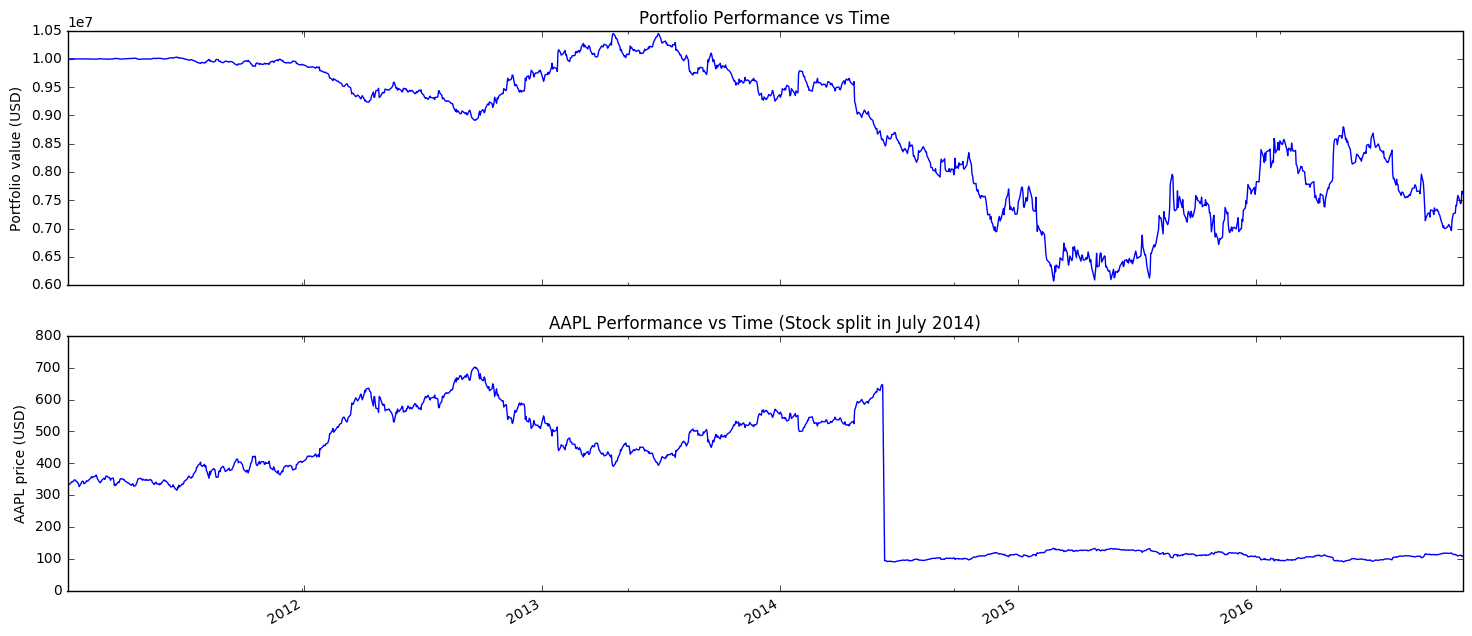

,AAPL,algo_volatility,algorithm_period_return,alpha,benchmark_period_return,benchmark_volatility,beta,capital_used,ending_cash,ending_exposure,...,short_exposure,short_value,shorts_count,sortino,starting_cash,starting_exposure,starting_value,trading_days,transactions,treasury_period_return
2011-01-03 21:00:00+00:00,329.570,NaN,0.000000e+00,NaN,0.011315,NaN,NaN,0.00,10000000.00,0.00,...,0.00,0.00,0,NaN,10000000.00,0.00,0.00,1,[],0.0336
2011-01-04 21:00:00+00:00,331.290,0.000001,-1.000000e-07,-0.000023,0.009987,0.141748,0.000008,3311.90,10003311.90,-3312.90,...,-3312.90,-3312.90,1,-11.224972,10000000.00,0.00,0.00,2,"[{'price': 331.28999999997285, 'commission': N...",0.0336
2011-01-05 21:00:00+00:00,334.000,0.000025,-2.910000e-06,-0.000254,0.015044,0.100231,0.000008,3339.00,10006650.90,-6680.00,...,-6680.00,-6680.00,1,-9.485309,10003311.90,-3312.90,-3312.90,3,"[{'price': 333.99999999995987, 'commission': N...",0.0350
2011-01-06 21:00:00+00:00,333.730,0.000024,-2.470000e-06,-0.000108,0.012889,0.099481,-0.000059,3336.30,10009987.20,-10011.90,...,-10011.90,-10011.90,1,-6.972457,10006650.90,-6680.00,-6680.00,4,"[{'price': 333.729999999971, 'commission': Non...",0.0344
2011-01-07 21:00:00+00:00,336.120,0.000051,-9.740000e-06,-0.000572,0.011021,0.093360,0.000145,3360.20,10013347.40,-13444.80,...,-13444.80,-13444.80,1,-8.870921,10009987.20,-10011.90,-10011.90,5,"[{'price': 336.11999999997295, 'commission': N...",0.0334
2011-01-10 21:00:00+00:00,342.455,0.000159,-3.518000e-05,-0.001723,0.009629,0.086675,0.000605,3423.55,10016770.95,-17122.75,...,-17122.75,-17122.75,1,-8.568755,10013347.40,-13444.80,-13444.80,6,"[{'price': 342.4549999999866, 'commission': No...",0.0332
2011-01-11 21:00:00+00:00,341.640,0.000157,-3.120500e-05,-0.001464,0.013390,0.080133,0.000707,3415.40,10020186.35,-20498.40,...,-20498.40,-20498.40,1,-7.036734,10016770.95,-17122.75,-17122.75,7,"[{'price': 341.6399999999864, 'commission': No...",0.0337
2011-01-12 21:00:00+00:00,344.420,0.000161,-4.798500e-05,-0.001625,0.022518,0.084200,0.000160,3443.20,10023629.55,-24109.40,...,-24109.40,-24109.40,1,-8.561453,10020186.35,-20498.40,-20498.40,8,"[{'price': 344.4199999999705, 'commission': No...",0.0340
2011-01-13 21:00:00+00:00,345.680,0.000151,-5.690500e-05,-0.001710,0.020769,0.082298,0.000201,3455.80,10027085.35,-27654.40,...,-27654.40,-27654.40,1,-9.209230,10023629.55,-24109.40,-24109.40,9,"[{'price': 345.67999999996925, 'commission': N...",0.0334
2011-01-14 21:00:00+00:00,348.480,0.000164,-7.940500e-05,-0.001910,0.028307,0.081684,-0.000129,3483.80,10030569.15,-31363.20,...,-31363.20,-31363.20,1,-10.042944,10027085.35,-27654.40,-27654.40,10,"[{'price': 348.47999999997137, 'commission': N...",0.0335


In [25]:
%%zipline --start=2011-1-1 --end=2016-11-11



from zipline.api import order, record, symbol



def initialize(context):
    pass


def handle_data(context, data):
    order(symbol('AAPL'), -10)
    record(AAPL=data.current(symbol('AAPL'), 'price'))


# Note: this function can be removed if running
# this algorithm on quantopian.com
def analyze(context=None, results=None):
    import matplotlib.pyplot as plt
    # Plot the portfolio and asset data.
    ax1 = plt.subplot(211)
    plt.title('Portfolio Performance vs Time')
    results.portfolio_value.plot(ax=ax1)
    ax1.set_ylabel('Portfolio value (USD)')
    ax2 = plt.subplot(212, sharex=ax1)
    plt.title('AAPL Performance vs Time (Stock split in July 2014)')
    results.AAPL.plot(ax=ax2)
    ax2.set_ylabel('AAPL price (USD)')

    # Show the plot.
    plt.gcf().set_size_inches(18, 8)
    plt.show()


# def _test_args():
#     """Extra arguments to use when zipline's automated tests run this example.
#     """
#     import pandas as pd

#     return {
#         'start': pd.Timestamp('2014-01-01', tz='utc'),
#         'end': pd.Timestamp('2014-11-01', tz='utc'),
#     }